<h1 align="center"><b>GRIP : The Sparks Foundation</b></h1>

<h1 align="center">Data Science and Business Analytics Intern</h1>

## **Task 1: Prediction using Supervised ML**
### **Predict Percentage of Student based on No. of study hours.**
In this we will use linear regression to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## **Author: Jagrut Manish Thakare**


In [1]:
# Importing all libraries required in this notebook
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Reading Data set
url = "student_scores - student_scores.csv"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10) #Prints first 10 rows of data set

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
print(data.shape) #Shows Rows 25 and columns 2

(25, 2)


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

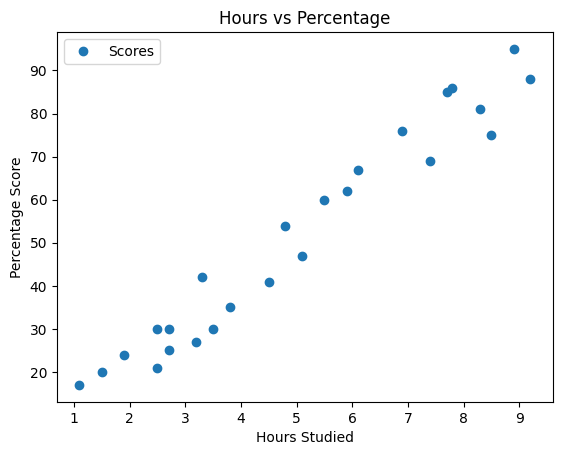

In [6]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  #Set Label for the plot
plt.xlabel('Hours Studied')       #Set Label for the X - axis
plt.ylabel('Percentage Score')    #Set Label for the Y - axis
plt.show() #Used to show plot

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [7]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:
data.corr(method='spearman') #bothe data shows that there is good correlation between hours and scores.

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [9]:
hours = data['Hours']
scores = data['Scores']


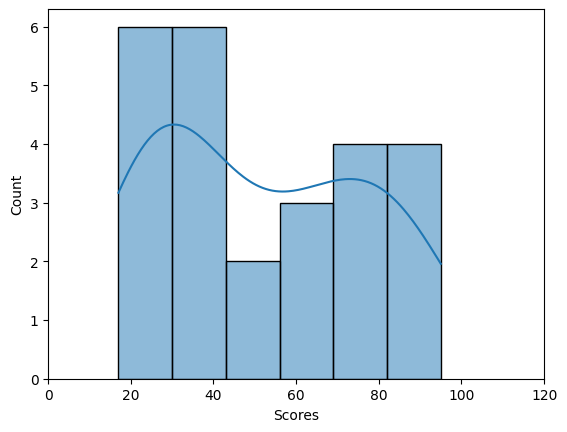

In [10]:
fig, ax = plt.subplots()
sns.histplot(scores, kde=True, ax = ax) # Plots Histogram
ax.set_xlim(0, 120)
plt.show()

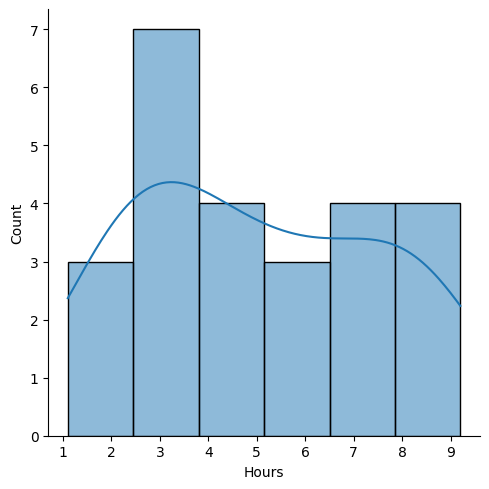

In [11]:
sns.displot(hours, kde=True)
plt.show()

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [12]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [13]:
from sklearn.model_selection import train_test_split  #this module is used to divide data set into random parts.
#in this case 20 % is used for test data and other for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=50) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [14]:
from sklearn.linear_model import LinearRegression  #This module will help in plotting linear Regression
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


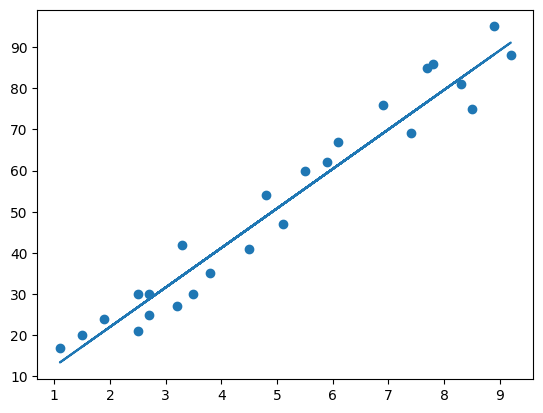

In [15]:
# Plotting the regression line
m = reg.coef_
c = reg.intercept_
line = m*X+c

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [16]:
print(X_test) # Testing data - In Hours
y_pred = reg.predict(X_test) # Predicting the scores

[[8.9]
 [2.7]
 [6.9]
 [3.8]
 [1.1]]


In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


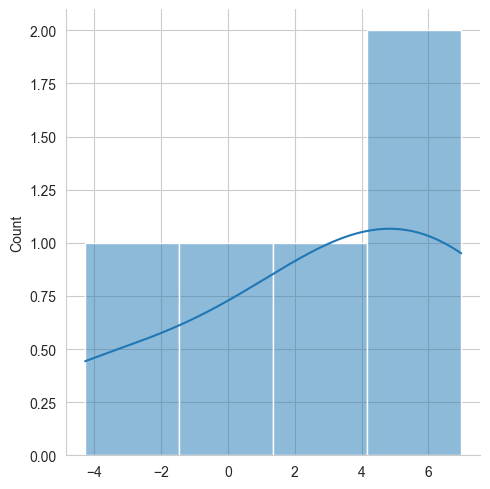

In [18]:
sns.set_style('whitegrid')
sns.displot(np.array(y_test-y_pred), kde=True)
plt.show()

# What would be the predicted score if a student studies for 9.25 hours/day?

In [19]:
# You can also test with your own data
hours = 9.25
own_pred = reg.predict([[hours]])
print("If a student studies for {} hours per day he/she will score {} % in exam".format(hours, own_pred))

If a student studies for 9.25 hours per day he/she will score [91.56986604] % in exam


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [20]:
from sklearn import metrics  
from sklearn.metrics import r2_score
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('R2 Score:', r2_score(y_test, y_pred)*100,"%")


Mean Absolute Error: 4.5916495300630285
R2 Score: 97.10141413299421 %
